# 1. 데이터 전처리

In [3]:
import pandas as pd
import numpy as np


In [224]:
df = pd.read_excel('total_crawl_data/naver_cafe_contents_ssal_2015.xlsx')
df.columns

Index(['title', 'nickname', 'date', 'content', 'comments'], dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11188 entries, 0 to 11187
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     11188 non-null  object
 1   nickname  11188 non-null  object
 2   date      11188 non-null  object
 3   content   11142 non-null  object
 4   comments  10180 non-null  object
dtypes: object(5)
memory usage: 437.2+ KB


## 01. 광고 아이디 제거

In [51]:
# 제거할 별명
del_id = [
'경민네찹쌀농장A195','삐삐야','갈래','진천임가네쌀','shdtka159','네드베둥','대한민국','연꽃',
'폭도의마술','피파다시한다'
]

In [52]:
drop_index=[]
for i in range(len(df)):
    if df['nickname'][i] in del_id :
        drop_index.append(i)

len(drop_index) # 아이디로 제거할 개수 확인

183

In [53]:
# 해당 아이디로 작성한 문서 제거
for i in range(len(drop_index)):
    drop_df = df.drop(index=drop_index)
len(drop_df)

11005

## 02. 관련 없는 키워드 제거

In [54]:
# 관련 없는 문서 제거 키워드
del_keywords=['출산가방', '오줌', '리퀘', 'Resoruce', '쌀흥하는', '쌀스럽다', '우리쌀님',
 '닭모이용', '쌀때', '카인', '힐더', '소환권', '비쌀때', '마리쌀', '드림', '유학', '배달직원', 
 '알바', '팝니다', '한율', '거래', '공지', '쌀화환', '쌀레에빼배', '쌀박물관', '쌀쌀',
  '쌀쌀한 날씨', '쌀뗴냐', '쌀 부가세', '그래프', '북한', '항쟁', '의원', '닭모이', '골동품',
  '민속품', '놀이', '빨대', '스킨', '토너', '에센스', '한율', '조성', '시범', '분배', '공양'
    # '후원', '기탁', '공헌', '기부', '기증', '전달', '지원', '쌀모으기''사랑의 쌀'
]  

In [55]:
# 키워드 제거한 것 
for i in del_keywords:
    drop_df=drop_df[drop_df['content'].str.contains(i) != True]
len(drop_df)

9653

In [56]:
drop_df.to_excel('preprocessing_data/preprocessing_2015_cafe_ssal.xlsx',encoding='utf-8')

## 03. 텍스트 분석 진행할 데이터 준비 (NA 제거)

In [205]:
drop_df = pd.read_excel('preprocessing_data/preprocessing_2015_cafe_ssal.xlsx')

In [207]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9653 non-null   int64 
 1   title       9653 non-null   object
 2   nickname    9653 non-null   object
 3   date        9653 non-null   object
 4   content     9607 non-null   object
 5   comments    8912 non-null   object
dtypes: int64(1), object(5)
memory usage: 452.6+ KB


In [208]:
# contents에 null 인것 제거
drop_df= drop_df.dropna(axis=0, how='any', subset=['content'])
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9607 entries, 0 to 9652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9607 non-null   int64 
 1   title       9607 non-null   object
 2   nickname    9607 non-null   object
 3   date        9607 non-null   object
 4   content     9607 non-null   object
 5   comments    8866 non-null   object
dtypes: int64(1), object(5)
memory usage: 525.4+ KB


In [213]:
# 인덱스 재설정
data = drop_df.reset_index()
data

,index,Unnamed: 0,title,nickname,date,content,comments
0,0,1,공구쌀 후기,메이주,2015.01.27,세종시로 올해 1월 10일 이사했습니다.어제 쌀이 똑 떨어졌는데 마침 까페에 쌀공구...,ㅎㅎ밥에 꿀발라~~~\n꿀바른것같은데 꿀맛이 안나고 밥맛이나죠\n꼬소름한 밥맛 ㅎㅎ...
1,1,2,빨간쌀 필요하신분이요^^,악기하는 여자,2015.01.04,저희 큰아버지께서 쌀도매를 하세요^^빨간쌀 이예요.저도 작녁부터 계속 먹고있는데요^...,네^^일반쌀 검정쌀 처럼 섞어드시는거구요♡\n구입 하시는분 많으심~~메타로 가져다 ...
2,2,3,쌀맛나는세상님 현미쌀 구입기^^,축복맘,2015.01.13,제가 변비가 심해서 현미쌀100%를,현미밥 어떻게하면 맛있나요?||밥솥이 중요한것 같아요~~ 밥솥 고장 나서 새로...
3,3,4,쌀찐빵 더 맛있게 먹기^^,은혜맘,2015.01.12,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요 아기간식도 요즘 고민...,||후기이벤트 당첨소식이 늦었습니다~!\n\n^^ 귀한후기 감사드립니다\n훈제기에 ...
4,4,5,당근쌀머핀 구워보아요~,호호바다,2015.01.11,심심한 일요일 오후.당근쌀머핀 만들어 보았어요~당근이랑 우유는 휘리릭 갈아주고밀가루...,강력말고 일반 쌀가루 써도 돼요? \n맛있어보여요 ~~^*^||원래 머핀은 박력쌀가...
...,...,...,...,...,...,...,...
9602,9648,11183,쌀 천연발효 요리전용 맛술,마미,2015.12.16,요리전용맛술 마트가면 보기는 했는데 저게 꼭 필요할까 하는 생각에 구매를 망설였는데...,NaN
9603,9649,11184,타파웨어다지기 불린쌀,mimi9342,2015.12.30,가능한가요;;;;;믹서기 청소가 귀찮아서 ;;;,안돼요
9604,9650,11185,쌀가루 미음 먹일때요,주부1단입니당,2015.12.25,담주부터 초기이유식 시작인데 아직 애가 못앉잖아요. 다들 그냥 분유주듯 안아서 먹이...,하루빨리 혼자 앉을수있음 좋겠어여ㅜㅋㅋ||바운서에 눕혀서 살짝 세워서 먹였어요~||...
9605,9651,11186,아이쌀튀밥~떡벙들~,시크민이맘,2015.12.23,어뭉들어디서 사드시나요? 아이간식사먹이는 사이트추천좀해주셔요^ ^,초록마을 잘먹었던거 같아요^^||초록삐을떡뻥 어제사왔는데 잘먹긴하는데 너무작네요ㅋ...


In [222]:
data.to_excel('preprocessing_cnts_dropna_data/preprocess_dropna_2015_cafe_ssal.xlsx',encoding='utf-8')

# 2. 빈도 확인_1차 (stopwords 제거 전)

In [210]:
from konlpy.tag import *

## 2-1. TEXT 클래스 이용 

In [211]:
# contents str로 처리
q= " "
for i in range(len(data)):
    try:
     q += data['content'][i]
    except:
     pass

In [212]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

text = Text(retokenize.tokenize(q))

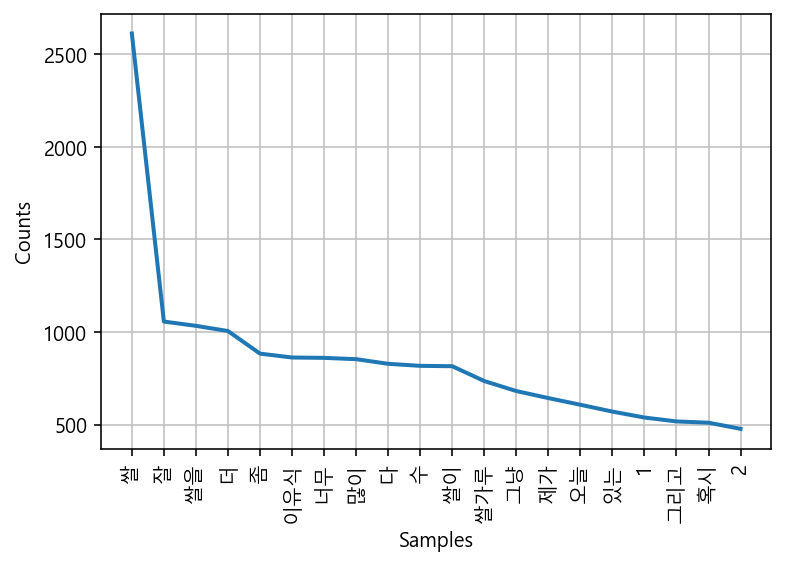

In [88]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 깨짐 설정

text.plot(20)
plt.show()

## 2-2 한나눔 형태소 분석기 사용 

In [214]:
len(data)

9607

In [215]:
#data 확인 :5093번 데이터가 숫자로 존재함을 확인함
data['content'][5093]

0

In [216]:
#데이터 타입을 모두 str 로 저장
data = data.astype('str')

In [217]:
# 사이즈 줄여 str로 저장 1000번 나눠서 저장 (10*960번) 960번을 더할것 즉, 10개묶음 960개 만들기
for i in range(0,960): # 960개 : text0~959
    globals()['text{}'.format(i)] = " " # 960개 text변수 생성
    for j in range(10*i,10*(i+1) ):
        globals()['text{}'.format(i)] += data['content'][j] # 960개의 text변수에 10개 묶음씩 저장
        # 0~9 / 10~19 / 20~29 저장~~ 9600~9609

# 마지막 데이터 수동 저장
text960 = ' '
for k in range(9600,9607): # 9606번까지 존재
    text960 += data['content'][k]


In [218]:
# 데이터 정제
import re
for i in range(0,961): # text0~960
    globals()['text{}'.format(i)] = re.sub('[0-9]+', '', globals()['text{}'.format(i)]) # 숫자 제거
    globals()['text{}'.format(i)] = re.sub('[A-Za-z]+', '', globals()['text{}'.format(i)]) # 알파벡 제거
    globals()['text{}'.format(i)] = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]', '', globals()['text{}'.format(i)]) # 특수문자 제거

In [227]:
hannanum = Hannanum()
for i in range(0,961):
    globals()['tokenized_text{}'.format(i)] = hannanum.nouns(globals()['text{}'.format(i)] ) # data['content'][2]
tokenized_text0

In [184]:
# 판다스 시리즈 만들기
for i in range(0,961):
    globals()['tokenized_texts{}'.format(i)] =pd.Series(globals()['tokenized_text{}'.format(i)])

In [185]:
# 시리즈 합치기
series_list = []
for i in range(0,961):
    series_list.append(globals()['tokenized_texts{}'.format(i)] )
tokenized_texts_series = pd.concat(series_list)

In [189]:
# 판다스 시리즈 이용해서 빈도 확인
result= tokenized_texts_series.value_counts().head(30)
result

쌀      3198
것      2167
수      1527
분      1441
쌀가루    1130
저       986
밥       946
이유식     937
때       891
일       688
데       657
오늘      542
맛       542
정도      501
후       476
원       475
시작      463
물       455
쌀미음     435
집       427
생각      407
키       399
지       384
전       383
개       369
양       368
이       353
한번      347
월       335
필요      319
dtype: int64

In [192]:
# 토큰화된 단어 전체 빈도와 함께 확인
whole_word_series = tokenized_texts_series.value_counts()

In [194]:
# 데이터 저장
whole_word_series.to_excel('word_series_2015_cafe.xlsx',encoding='utf-8')

 => 띄어쓰기 어느 정도는 해결되나 아직 부족.. 

### => twitter 형태소 분석기가 띄어쓰기 안된 문장에 대하여 성능이 가장 좋고, stemming 가능하며, 비속어, 비표준어도 분석가능하므로, 이를 통해  빈도파악을 시도해보자! 

## 2-3. okt 형태소 분석기 사용
Twitter() has changed to Okt() since v0.5.0.

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('preprocessing_cnts_dropna_data/preprocess_dropna_2015_cafe_ssal.xlsx')

In [3]:
# contents str로 처리
q= " "
for i in range(len(data)):
    try:
     q += data['content'][i]
    except:
     pass

In [70]:
from konlpy.tag import Okt
okt = Okt()
nouns = okt.nouns(q)


In [47]:
# 1) counter로 확인-> 엑셀로 저장이 안됨, 데이터프레임 또 만들어서 저장하면되나 -> 시리즈로 빈도 확인하여 바로 저장해보겠다!
from collections import Counter
count = Counter(nouns)
count.most_common(30)

[('쌀', 16251),
 ('가루', 3102),
 ('이유식', 2185),
 ('밥', 1976),
 ('요', 1922),
 ('때', 1709),
 ('분', 1643),
 ('맛', 1597),
 ('미음', 1357),
 ('것', 1337),
 ('오늘', 1295),
 ('더', 1264),
 ('물', 1257),
 ('정도', 1250),
 ('좀', 1248),
 ('과자', 1246),
 ('시작', 1131),
 ('집', 1129),
 ('현미', 1120),
 ('제', 1048),
 ('저', 1025),
 ('떡', 923),
 ('거', 903),
 ('수', 891),
 ('아기', 887),
 ('주문', 854),
 ('혹시', 834),
 ('곳', 810),
 ('그냥', 805),
 ('판매', 801)]

In [48]:
# 2) 시리즈로 빈도확인
okt_series = pd.Series(nouns).value_counts()
okt_series

쌀       16251
가루       3102
이유식      2185
밥        1976
요        1922
        ...  
일제시대        1
식권          1
맛나거쥬        1
채친          1
업스셔         1
Length: 18768, dtype: int64

In [33]:
# 데이터 저장
okt_series.to_excel('okt_preprocessing_word_series_2015_cafe.xlsx',encoding='utf-8')

### => 해당 비정형 데이터는 okt()가 가장 효과적임을 확인

# 3. OKt() 선택하여 빈도분석 그래프 그리기

## 01. 데이터 정제

In [120]:
len(q)

1679933

In [199]:
# okt() 돌리는 시간 단축을 위하여 임시 저장
nouns2 =nouns

In [209]:
# stopwords로 제거
stopwords_nouns = ['요','때','분','것','오늘','더','정도','좀','시작','제','저','거','수','이제','또','하나','그냥','곳','주문','혹시','전','개','생각','해','후',
                    '한번','우리','이','맘','글','직접','사용','개월','조금','중','안','구입','초기','바로','처음','번','지금','시간','구매','정말','용','저희',
                    '이번','다시','어제','쌀','구','엄마','키','뭐','하루','걸','아시','말','가요','때문','등','그','이상','다른','날','계속','신랑','준비','요즘',
                    '신분','사진','킹','추천','판매','가지',#추가제거
                    '정보','추천','유통','농사','방법','나눔','시댁','다음','달','제품','이용','어디','꼭','사서','애','알','배','도','마을','교환','먹이','나','일','얼마',
                    '손','보고','위','시골','입','통','걱정','사람','연락','먹기','기','실','만','친정','살',
                    '모두','내일','아주','댓글','미리','질문','시','진짜','완전','근처','중기','고민','거의','끼','포대'  #추가제거 
]


In [210]:
# 데이터 정제
for anoun in nouns2:
    if anoun in stopwords_nouns:
      nouns2.remove(anoun)  # stopwords 제거

    if anoun =='아가' :
      nouns2.remove(anoun)
      nouns2.append('아이')
    
    if anoun =='아기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun =='애기':
      nouns2.remove(anoun)
      nouns2.append('아이')
    
    if anoun == '베이':
      nouns2.remove(anoun)
      nouns2.append('베이킹')

In [211]:
#벌레관련 데이터 정제
for anoun in nouns2:
    if anoun =='벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌레' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='바구미' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

In [212]:
#유통기한관련
for anoun in nouns2:
    if anoun =='기한' :
        nouns2.remove(anoun)
        nouns2.append('유통기한')

In [213]:
#배송관련
for anoun in nouns2:
    if anoun =='배송' :
        nouns2.remove(anoun)
        nouns2.append('배달')
    if anoun =='택배' :
        nouns2.remove(anoun)
        nouns2.append('배달')

## 02. 빈도 파악

In [214]:
# 명사별 빈도구해 튜플로 저장
cnt = Counter(nouns2)

In [215]:
# 상위 30 확인
top30=cnt.most_common(30)
top30

[('가루', 3102),
 ('아이', 2233),
 ('이유식', 2185),
 ('밥', 1976),
 ('맛', 1597),
 ('미음', 1357),
 ('물', 1257),
 ('과자', 1246),
 ('배달', 1151),
 ('집', 1129),
 ('현미', 1120),
 ('떡', 923),
 ('보관', 729),
 ('벌레', 665),
 ('찹쌀', 620),
 ('도정', 594),
 ('가격', 580),
 ('마트', 496),
 ('유기농', 475),
 ('빵', 460),
 ('포장', 422),
 ('백미', 409),
 ('재료', 398),
 ('반죽', 381),
 ('양', 377),
 ('아침', 353),
 ('간식', 353),
 ('튀밥', 348),
 ('봉지', 342),
 ('야채', 335)]

## 03. 빈도 그래프 그리기

In [190]:
# 폰트 깨짐 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

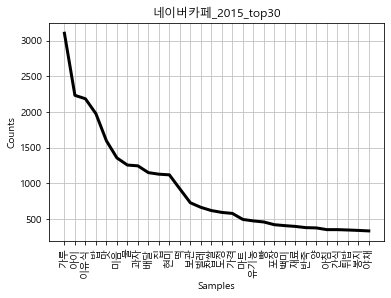

<AxesSubplot:title={'center':'네이버카페_2015_top30'}, xlabel='Samples', ylabel='Counts'>

In [220]:
#top 30 그래프 그리
import nltk
fregra = nltk.FreqDist(nouns2)

fregra.plot(30, cumulative=False, color='black',
                   title="네이버카페_2015_top30", linewidth=3)

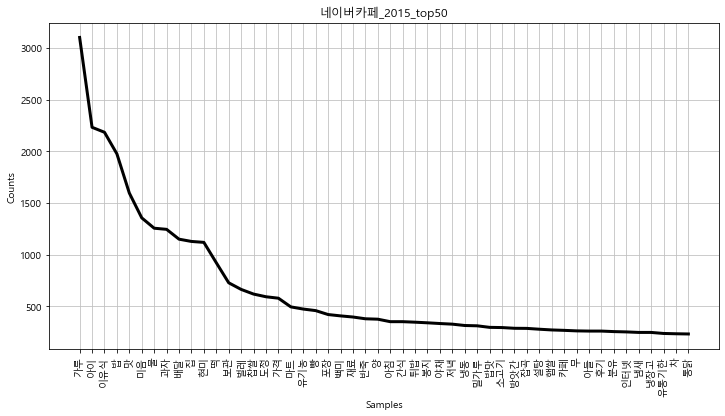

<AxesSubplot:title={'center':'네이버카페_2015_top50'}, xlabel='Samples', ylabel='Counts'>

In [219]:
# top 50 그래프 그리기
from nltk.probability import FreqDist
fregra = nltk.FreqDist(nouns2)
plt.figure(figsize=(12,6))
fregra.plot(50, cumulative=False, color='black',
            title="네이버카페_2015_top50", linewidth=3)